In [1]:
!pip install nilearn

import numpy as np
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import index_img
import nibabel as nib
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

brain_data = datasets.fetch_oasis_vbm(n_subjects=100)
crad = datasets.fetch_atlas_craddock_2012()
atlas_nii = index_img(crad['scorr_mean'], 42) # this needs to be modified for some tasks
print('%i regions found in this atlas' % (len(np.unique(atlas_nii.get_data().ravel())) - 1))
masker = NiftiLabelsMasker(labels_img= atlas_nii, standardize=True)
input_variables = masker.fit_transform(brain_data.gray_matter_maps)
output_variable = np.array(brain_data.ext_vars.mf == b'F', dtype=np.int) # gives 1 for females and 0 for males


     |████████████████████████████████| 10.0 MB 11.6 MB/s 


/usr/local/lib/python3.7/dist-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)



Dataset created in /root/nilearn_data/oasis1



Downloaded 901136384 of 905208634 bytes (99.6%,    0.1s remaining) ...done. (32 seconds, 0 min)
Extracting data from /root/nilearn_data/oasis1/adcb228c7b26ed4f4fba93bd32bf8d97/archive_dartel.tgz..... done.
/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:2349: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)



Dataset created in /root/nilearn_data/craddock_2012



 ...done. (1 seconds, 0 min)
Extracting data from /root/nilearn_data/craddock_2012/45a4e574a5c116b8be81d080bdaa0814/craddock_2011_parcellations.tar.gz..... done.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  from ipykernel import kernelapp as app


788 regions found in this atlas


i:  2 accuracy:  0.75
i:  4 accuracy:  0.75
i:  6 accuracy:  0.8
i:  8 accuracy:  0.8
i:  10 accuracy:  0.85
[2, 4, 6, 8, 10]
[0.75, 0.75, 0.8, 0.8, 0.85]


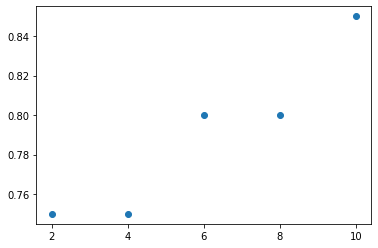

In [2]:
def plot_each_K_best(i):


  ############## note no bootstrap, just taking the first 80% of 100 subjects, that is the first 80 subjects as training set ############

  X_reduced = SelectKBest(score_func=f_classif,k=i).fit_transform(input_variables,output_variable)
  train_input = X_reduced[:80]
  train_output = output_variable[:80]

  test_input = X_reduced[80:]
  test_output = output_variable[80:]

  model = LogisticRegression(C=1.0).fit(train_input,train_output)

  predict_output = model.predict(test_input)
  accuracy = np.sum(predict_output == test_output)/len(test_output)

  return i, accuracy

x_list = [] ### n_rois
y_list = [] ### accuracy

for i in range(2,12,2):
  i, accuracy = plot_each_K_best(i)
  print("i: ", i,"accuracy: ", accuracy)
  x_list.append(i)
  y_list.append(accuracy)

print(x_list)
print(y_list)
plt.xticks(x_list)
plt.scatter(x_list,y_list)